# scipy is a library for fundamental analysis algorithms
* [Statistics](https://scipy.github.io/devdocs/reference/stats.html#module-scipy.stats)
* [Distance calculaton](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)
* [Contingency table](https://docs.scipy.org/doc/scipy/reference/stats.contingency.html)
* [Optimization](https://scipy.github.io/devdocs/tutorial/optimize.html)

# [statsmodels](https://www.statsmodels.org/stable/examples/index.html) provide more advanced regression analyses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
import statsmodels

## Load gene expression and mutation data

In [2]:
exp_data = pd.read_excel('CRC_sample_data.xlsx', sheet_name = 'expression', header = 0, index_col = 0)
mut_data = pd.read_excel('CRC_sample_data.xlsx', sheet_name = 'mutation', header = 0, index_col = 0)

data = pd.concat([exp_data, mut_data], axis = 1)
data.head()

,FAP,SLC5A6,GFPT2,ASCL2,TSPAN6,CCDC80,DUSP4,EFEMP2,TRIM7,DCN,...,POFUT1,RETNLB,CMS,KRAS,BRAF,APC,TP53,PIK3CA,PTEN,microsatelite_status
SampleID,,,,,,,,,,,,,,,,,,,,,
Patient1,5.317879,7.521597,5.458581,7.873975,6.777987,5.148662,6.372153,6.495578,5.361258,7.529628,...,6.556573,5.782625,CMS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient2,5.462626,7.613383,3.996901,7.036830,7.610739,5.583870,6.889211,6.049421,6.075198,7.027278,...,5.765743,4.195767,CMS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient3,5.364091,8.152112,4.220819,4.225933,7.615335,5.042837,6.566867,6.224913,4.497239,6.609805,...,6.179182,3.402747,CMS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient4,7.241834,6.989748,5.535980,7.283076,6.760564,7.076600,6.418798,7.018138,5.620279,8.986782,...,5.978596,2.750682,CMS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient5,5.732008,7.252843,5.003082,6.519208,8.357291,5.660058,4.525700,6.506203,5.300539,7.059266,...,5.850525,4.431800,CMS1,wt,wt,wt,wt,mt,mt,MSI


## Check whether data is normally distributed
[normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) from scipy.stats

What does this p-value mean?

In [3]:
print(scipy.stats.normaltest(data['FAP']))

NormaltestResult(statistic=0.6722289786125877, pvalue=0.714541293795801)


### Visualize the best normal distribution fit for the data
**norm.fit** estimates the maximum likelihood estimates for mean & SD from data

**norm.pdf** calculates the theoretical density

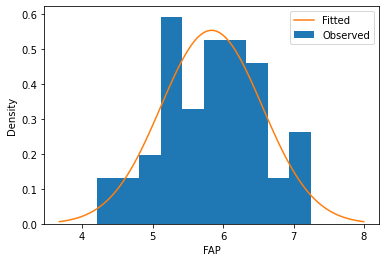

In [4]:
mean, std = scipy.stats.norm.fit(data['FAP'])

plt.figure()
plt.hist(data['FAP'], bins = 10, density = True, label = 'Observed')

x = np.linspace(mean - 3 * std, mean +  3 * std, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std), label = 'Fitted')

plt.xlabel('FAP'); plt.ylabel('Density'); plt.legend()
plt.show()

## Q-Q plot

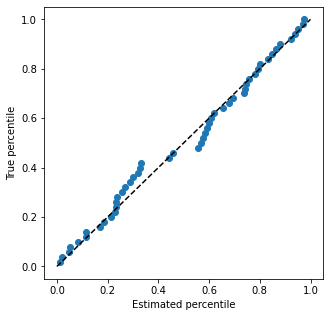

In [8]:
mean, std = scipy.stats.norm.fit(data['FAP'])

sorted_fap = sorted(data['FAP'].values)
true_prc = [i / data.shape[0] for i in range(1, data.shape[0] + 1)]
est_prc = scipy.stats.norm.cdf(sorted_fap, mean, std)

plt.figure(figsize = (5, 5))
plt.scatter(est_prc, true_prc)
plt.plot([0, 1], [0, 1], '--k')
plt.xlabel('Estimated percentile'); plt.ylabel('True percentile')
plt.show()

In [6]:
print(true_prc)

[0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]


In [7]:
print(est_prc)

[0.01176292 0.01958525 0.04645463 0.05049444 0.0832736  0.11489455
 0.11647623 0.17120334 0.18457155 0.21229971 0.23003379 0.23188151
 0.23496216 0.23746735 0.25514873 0.26710944 0.28939599 0.3010345
 0.32146254 0.32802849 0.33277901 0.44155373 0.45659893 0.55808451
 0.56853317 0.57533049 0.58237055 0.59349846 0.60085639 0.60927353
 0.61982178 0.65354656 0.67940263 0.69252886 0.73788518 0.74232365
 0.74690625 0.75621005 0.77950649 0.79192062 0.79897713 0.83108164
 0.8467353  0.86383497 0.87811585 0.92150054 0.93919218 0.94982099
 0.97177948 0.97449388]


## Compare AGR2 expression across CMS groups

In [9]:
cms1_agr2 = data.loc[data['CMS'] == 'CMS1', 'AGR2']
cms2_agr2 = data.loc[data['CMS'] == 'CMS2', 'AGR2']
cms3_agr2 = data.loc[data['CMS'] == 'CMS3', 'AGR2']

/Users/kppt/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


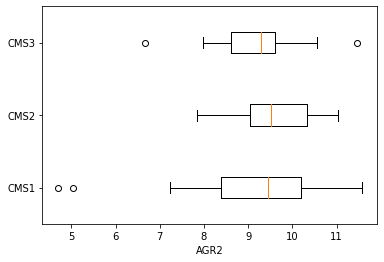

In [10]:
plt.figure()
plt.boxplot([cms1_agr2, cms2_agr2, cms3_agr2], labels = ['CMS1', 'CMS2', 'CMS3'], vert = False)
plt.xlabel('AGR2')
plt.show()

### Use t-test or Mann-Whitney U test

In [11]:
print('CMS1 vs CMS2')
print(scipy.stats.ttest_ind(cms1_agr2, cms2_agr2, equal_var = False, alternative = 'two-sided'))
print(scipy.stats.mannwhitneyu(cms1_agr2, cms2_agr2, alternative = 'two-sided'))

CMS1 vs CMS2
Ttest_indResult(statistic=-1.3391363869959167, pvalue=0.19058985088422298)
MannwhitneyuResult(statistic=126.0, pvalue=0.4334313937003256)


In [12]:
print('CMS1 vs CMS3')
print(scipy.stats.ttest_ind(cms1_agr2, cms3_agr2, equal_var = False, alternative = 'two-sided'))
print(scipy.stats.mannwhitneyu(cms1_agr2, cms3_agr2, alternative = 'two-sided'))

CMS1 vs CMS3
Ttest_indResult(statistic=-0.36826904753727113, pvalue=0.7150842259197574)
MannwhitneyuResult(statistic=153.0, pvalue=0.9335864962947554)


In [13]:
print('CMS2 vs CMS3')
print(scipy.stats.ttest_ind(cms2_agr2, cms3_agr2, equal_var = False, alternative = 'two-sided'))
print(scipy.stats.mannwhitneyu(cms2_agr2, cms3_agr2, alternative = 'two-sided'))

CMS2 vs CMS3
Ttest_indResult(statistic=1.1743172276152125, pvalue=0.2504827034844691)
MannwhitneyuResult(statistic=136.0, pvalue=0.3400858902842717)


## ANOVA
[f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

In [14]:
print(scipy.stats.f_oneway(data['AGR2'].loc[data['CMS'] == 'CMS1'],
                           data['AGR2'].loc[data['CMS'] == 'CMS2'],
                           data['AGR2'].loc[data['CMS'] == 'CMS3']))

F_onewayResult(statistic=0.8892122675203398, pvalue=0.41777946129988164)


## Correlation scores
* [Pearson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
* [Spearman](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)
* [Kendall](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)

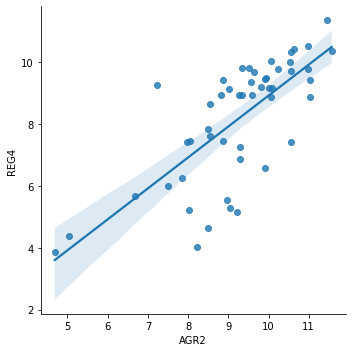

In [15]:
_ = sns.lmplot(data = data, x = 'AGR2', y = 'REG4')

In [16]:
print('Pearson:', scipy.stats.pearsonr(data['AGR2'], data['REG4']))
print('Spearman:', scipy.stats.spearmanr(data['AGR2'], data['REG4']))
print('Kendall:', scipy.stats.kendalltau(data['AGR2'], data['REG4']))

Pearson: (0.7316565727656428, 1.5818530658956757e-09)
Spearman: SpearmanrResult(correlation=0.7301320528211284, pvalue=1.7777764336740489e-09)
Kendall: KendalltauResult(correlation=0.5510204081632653, pvalue=1.6395769802108334e-08)


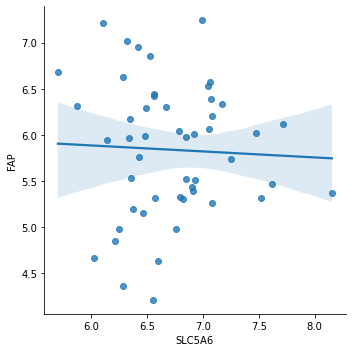

In [17]:
_ = sns.lmplot(data = data, x = 'SLC5A6', y = 'FAP')

In [18]:
print('Pearson:', scipy.stats.pearsonr(data['SLC5A6'], data['FAP']))
print('Spearman:', scipy.stats.spearmanr(data['SLC5A6'], data['FAP']))
print('Kendall:', scipy.stats.kendalltau(data['SLC5A6'], data['FAP']))

Pearson: (-0.043464480172998025, 0.7643995689756427)
Spearman: SpearmanrResult(correlation=-0.006194477791116446, pvalue=0.9659453951391317)
Kendall: KendalltauResult(correlation=0.0008163265306122448, pvalue=0.9933258869658097)


## Paired data
This is a toy data of model A and B's performances across 7 datasets

In [19]:
auc_df = pd.DataFrame([[0.701, 0.503, 0.991, 0.827, 0.623, 0.728, 0.596], 
                       [0.691, 0.478, 0.905, 0.739, 0.589, 0.719, 0.508]],
                      index = ['Model A', 'Model B'], columns = ['Dataset ' + str(i) for i in range(1, 8)])
auc_df.head()

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Dataset 5,Dataset 6,Dataset 7
Model A,0.701,0.503,0.991,0.827,0.623,0.728,0.596
Model B,0.691,0.478,0.905,0.739,0.589,0.719,0.508


### Visualize with box and scatter plots

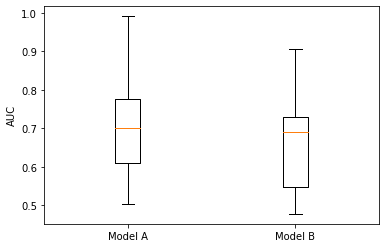

In [20]:
plt.figure()
plt.boxplot([auc_df.loc['Model A', :], auc_df.loc['Model B', :]], labels = ['Model A', 'Model B'])
plt.ylabel('AUC')
plt.show()

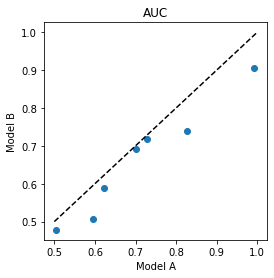

In [21]:
plt.figure(figsize = (4, 4))
plt.scatter(auc_df.loc['Model A', :], auc_df.loc['Model B', :])
plt.xlabel('Model A'); plt.ylabel('Model B'); plt.title('AUC')
plt.plot([0.5, 1], [0.5, 1], '--k')
plt.show()

### What happen if you switch paired and unpaired tests?

In [22]:
print('unpaired t-test:', scipy.stats.ttest_ind(auc_df.loc['Model A', :], auc_df.loc['Model B', :]))
print('paired t-test:', scipy.stats.ttest_rel(auc_df.loc['Model A', :], auc_df.loc['Model B', :]))

print('---------------------------------------')
print('Mann-Whitney U test:', scipy.stats.mannwhitneyu(auc_df.loc['Model A', :], auc_df.loc['Model B', :]))
print('Wilcoxon signed rank test:', scipy.stats.wilcoxon(auc_df.loc['Model A', :], auc_df.loc['Model B', :]))

unpaired t-test: Ttest_indResult(statistic=0.5861139805745107, pvalue=0.5686597321571196)
paired t-test: Ttest_relResult(statistic=3.4485643789623377, pvalue=0.013656963060721596)
---------------------------------------
Mann-Whitney U test: MannwhitneyuResult(statistic=29.0, pvalue=0.6200466200466201)
Wilcoxon signed rank test: WilcoxonResult(statistic=0.0, pvalue=0.015625)


## Test for association between CMS and KRAS mutation

In [23]:
cms_vs_kras = pd.crosstab(index = data['CMS'], columns = data['KRAS'])
cms_vs_kras.head()

KRAS,mt,wt
CMS,,
CMS1,4,8
CMS2,1,11
CMS3,6,5


### Use [fisher_exact](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html)
CMS2 vs non-CMS2

In [24]:
cms2_vs_kras = pd.crosstab(index = data['CMS'] == 'CMS2', columns = data['KRAS'])
display(cms2_vs_kras)
print('two-tailed Fisher\'s exact:', scipy.stats.fisher_exact(cms2_vs_kras))

KRAS,mt,wt
CMS,,
False,10,13
True,1,11


two-tailed Fisher's exact: (8.461538461538462, 0.055192798433654294)


CMS3 vs other CMS

In [25]:
cms3_vs_kras = pd.crosstab(index = data['CMS'] == 'CMS3', columns = data['KRAS'])
display(cms3_vs_kras)
print('two-tailed Fisher\'s exact:', scipy.stats.fisher_exact(cms3_vs_kras))

KRAS,mt,wt
CMS,,
False,5,19
True,6,5


two-tailed Fisher's exact: (0.21929824561403508, 0.06228994173180524)


## Use looping to perform all CMS vs mutation tests

In [28]:
all_fishers = pd.DataFrame(columns = ['p-value'])

for cms in pd.unique(data['CMS']):
    for gene in ['KRAS', 'BRAF', 'APC', 'TP53', 'PIK3CA', 'PTEN']:
        test_name = cms + ':' + gene
        temp = pd.crosstab(index = data['CMS'] == cms, columns = data[gene])
        all_fishers.loc[test_name, :] = scipy.stats.fisher_exact(temp)[1]

all_fishers = all_fishers.sort_values('p-value')
all_fishers.head(10)

,p-value
CMS2:KRAS,0.055193
CMS3:KRAS,0.06229
CMS2:APC,0.258982
CMS2:PTEN,0.402388
CMS1:APC,0.450605
CMS2:BRAF,0.475862
CMS1:TP53,0.685468
CMS1:PTEN,0.685468
CMS3:TP53,0.685468
CMS1:PIK3CA,0.706206


## Correction for multiple testing
Starting with Bonferroni. We are using 0.1 cutoff just to show the effect

In [29]:
cutoff = 0.1

all_fishers['No correction'] = all_fishers['p-value'] <= cutoff
all_fishers.head()

,p-value,No correction
CMS2:KRAS,0.055193,True
CMS3:KRAS,0.06229,True
CMS2:APC,0.258982,False
CMS2:PTEN,0.402388,False
CMS1:APC,0.450605,False


In [30]:
all_fishers['Bonferroni'] = all_fishers['p-value'] <= cutoff / all_fishers.shape[0]
all_fishers.head()

,p-value,No correction,Bonferroni
CMS2:KRAS,0.055193,True,False
CMS3:KRAS,0.06229,True,False
CMS2:APC,0.258982,False,False
CMS2:PTEN,0.402388,False,False
CMS1:APC,0.450605,False,False


## Benjamini-Hochberg and more
[multipletests](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html)

In [31]:
from statsmodels.stats.multitest import multipletests

benjamini_hochberg = multipletests(all_fishers['p-value'].values, alpha = cutoff, method = 'fdr_bh')
print(benjamini_hochberg)

(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False]), array([0.5606094755862472, 0.5606094755862472, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
      dtype=object), 0.005836264433394134, 0.005555555555555556)


In [32]:
pd.DataFrame(benjamini_hochberg[0:2], index = ['Test result', 'FDR'], columns = all_fishers.index)

,CMS2:KRAS,CMS3:KRAS,CMS2:APC,CMS2:PTEN,CMS1:APC,CMS2:BRAF,CMS1:TP53,CMS1:PTEN,CMS3:TP53,CMS1:PIK3CA,CMS3:APC,CMS3:BRAF,CMS1:BRAF,CMS1:KRAS,CMS2:TP53,CMS3:PIK3CA,CMS2:PIK3CA,CMS3:PTEN
Test result,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
FDR,0.560609,0.560609,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Permutation test with numpy.random
1. Shuffle expression values for REG4
2. Recalculate correlation between AGR2 and shuffled REG4
3. Show the distribution of shuffled correlations compared to the actual value

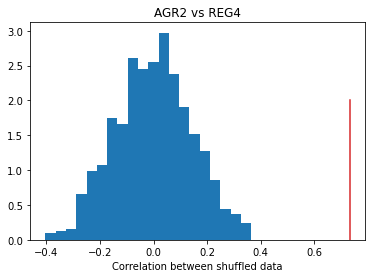

In [43]:
np.random.seed(4649)
all_corrs = []

for i in range(1000):
    shuffled_REG4 = data['REG4'].iloc[np.random.permutation(data.shape[0])]
    all_corrs.append(scipy.stats.pearsonr(data['AGR2'], shuffled_REG4)[0])
    
obs_corr = scipy.stats.pearsonr(data['AGR2'], data['REG4'])[0]
    
plt.hist(all_corrs, bins = 20, density = True)
plt.plot([obs_corr, obs_corr], [0, 2], c = 'tab:red')
plt.xlabel('Correlation between shuffled data'); plt.title('AGR2 vs REG4')
plt.show()

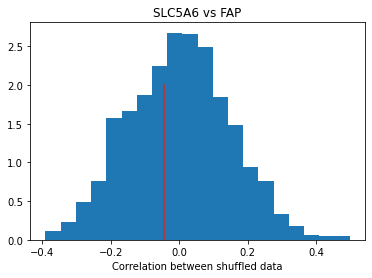

In [44]:
np.random.seed(4649)
all_corrs = []

for i in range(1000):
    shuffled_FAP = data['FAP'].iloc[np.random.permutation(data.shape[0])]
    all_corrs.append(scipy.stats.pearsonr(data['SLC5A6'], shuffled_FAP)[0])
    
obs_corr = scipy.stats.pearsonr(data['SLC5A6'], data['FAP'])[0]
    
plt.hist(all_corrs, bins = 20, density = True)
plt.plot([obs_corr, obs_corr], [0, 2], c = 'tab:red')
plt.xlabel('Correlation between shuffled data'); plt.title('SLC5A6 vs FAP')
plt.show()

## Bootstrapping with numpy.random.choice
Randomly select 40% of the patients (with or without repetition)

In [61]:
np.random.choice(range(10), size = 6, replace = False)

array([1, 0, 7, 8, 3, 5])

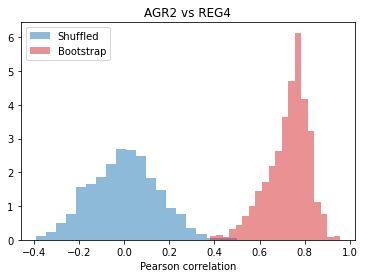

In [62]:
np.random.seed(4649)
subset_size = int(data.shape[0] * 0.4)
reg4_agr2_corrs = []

for i in range(1000):
    bootstrap = data.loc[np.random.choice(data.index, size = subset_size, replace = False), :]
    reg4_agr2_corrs.append(scipy.stats.pearsonr(bootstrap['REG4'], bootstrap['AGR2'])[0])
    
plt.hist(all_corrs, bins = 20, density = True, label = 'Shuffled', alpha = 0.5)
plt.hist(reg4_agr2_corrs, bins = 20, density = True, facecolor = 'tab:red', label = 'Bootstrap', alpha = 0.5)
plt.xlabel('Pearson correlation'); plt.title('AGR2 vs REG4'); plt.legend()
plt.show()

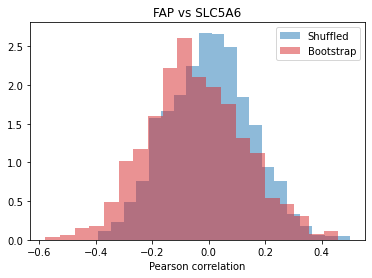

In [63]:
np.random.seed(4649)
subset_size = int(data.shape[0] * 0.4)
reg4_agr2_corrs = []

for i in range(1000):
    bootstrap = data.loc[np.random.choice(data.index, size = subset_size, replace = False), :]
    reg4_agr2_corrs.append(scipy.stats.pearsonr(bootstrap['FAP'], bootstrap['SLC5A6'])[0])
    
plt.hist(all_corrs, bins = 20, density = True, label = 'Shuffled', alpha = 0.5)
plt.hist(reg4_agr2_corrs, bins = 20, density = True, facecolor = 'tab:red', label = 'Bootstrap', alpha = 0.5)
plt.xlabel('Pearson correlation'); plt.title('FAP vs SLC5A6'); plt.legend()
plt.show()